# Homework 5


# Setting up the environment
We load `dotenv`, and thus our configuration file:

In [1]:
from dotenv import load_dotenv
import os
load_dotenv()
dataset_path = os.getenv('HOMEWORK_DATASET')

We load the used dependencies:

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


We then load the dataset using `pd.read_excel`:

In [3]:
dtypes = {
    "Paziente": pd.Int32Dtype(),
    "Sesso": pd.CategoricalDtype(['F','M']),
    "Età equivalente": pd.Int8Dtype(),
    "B1": pd.Int8Dtype(),
    "B6": pd.Int8Dtype(),
    "B10": pd.Int8Dtype(),
    "B11": pd.Int8Dtype(),
    "B13": pd.Int8Dtype(),
    "B14": pd.Int8Dtype(),
    "B16": pd.Int8Dtype(),
    "B2": pd.Int8Dtype(),
    "B3": pd.Int8Dtype(),
    "B9": pd.Int8Dtype(),
    "B10": pd.Int8Dtype(),
    "B13": pd.Int8Dtype(),
    "B14": pd.Int8Dtype(),
    "D3": pd.Int8Dtype(),
    "D4": pd.Int8Dtype(),
    "D13": pd.Int8Dtype(),
    "D14": pd.Int8Dtype(),
    "D15": pd.Int8Dtype(),
    "D16": pd.Int8Dtype(),
    "D18": pd.Int8Dtype(),
    "D2": pd.Int8Dtype(),
    "D3": pd.Int8Dtype(),
    "D4": pd.Int8Dtype(),
    "D7": pd.Int8Dtype(),
    "D8": pd.Int8Dtype(),
    "D9": pd.Int8Dtype(),
    "D10": pd.Int8Dtype(),
    "D13": pd.Int8Dtype(),
    "D14": pd.Int8Dtype(),
    "D15": pd.Int8Dtype(),
    "D1": pd.Int8Dtype(),
    "D2": pd.Int8Dtype(),
    "D4": pd.Int8Dtype(),
    "D5": pd.Int8Dtype(),
    "D7": pd.Int8Dtype(),
    "D8": pd.Int8Dtype(),

}

class_names = ['ASD','GDD', 'Controlli']
sheets = pd.read_excel(
    dataset_path,
    sheet_name=class_names,
    header=1,
    index_col=0,
    dtype=dtypes
)

Then we merge each sheet of our loaded excel file, drop irrelevant features and accept only those kids with at least 12 months of equivalent age:

In [4]:

for [class_name, df] in sheets.items():
    df['class_name'] = class_name

df = pd.concat([
    ds for ds in sheets.values()
])

df = df.drop(columns=['Età cronologica (mesi)', "Scala B", "Scala D", "TOT.", "Score di rischio"])
df['Sesso'] = df['Sesso'].map( lambda x: 0 if x == 'M' else 1)

df = df[df['Età equivalente'] >=12]
df

,Sesso,Età equivalente,B1,B6,B10,B11,B13,B14,B16,B2,...,D13.1,D14.1,D15.1,D1,D2.1,D4.2,D5,D7.1,D8.1,class_name
Pazienti,,,,,,,,,,,,,,,,,,,,,
1,1,24,0,0,0,0,0,0,0,0,...,0,1,0,1,2,1,1,2,1,ASD
2,1,27,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,ASD
3,0,20,0,0,0,0,2,0,0,0,...,0,1,0,1,2,1,1,2,1,ASD
4,1,29,2,0,0,1,2,1,1,1,...,0,1,0,1,2,1,1,0,0,ASD
5,0,26,0,0,0,0,0,0,0,1,...,0,1,0,1,2,1,1,2,1,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0,28,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,Controlli
55,1,18,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Controlli
56,0,26,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,Controlli


# Task 1: Plotting the dataset
Task one requires to plot patients with a 2D scatter plot.

Thus far, we can directly apply a PCA with 2 components to our dataset and reapply classes:

In [5]:
plot_df = df.drop(columns=["class_name"])


plot_df = pd.DataFrame(
    data=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(plot_df)),
    columns=['x','y'],
    index=df.index,
)

plot_df['class_name'] = df['class_name']

plot_df

,x,y,class_name
Pazienti,,,
1,-0.409012,5.074032,ASD
2,-2.177355,-0.281238,ASD
3,-1.300229,4.599480,ASD
4,2.373147,1.936113,ASD
5,-2.143736,3.896934,ASD
...,...,...,...
54,-1.596151,-1.222811,Controlli
55,-1.844843,-1.047786,Controlli
56,-2.374911,1.695117,Controlli


Then print with a scatterplot, pretty simple:
> As an expected result, kids without autism are nearly indistinguishable to each other, while most of the ones affected are scattered all over the plot.

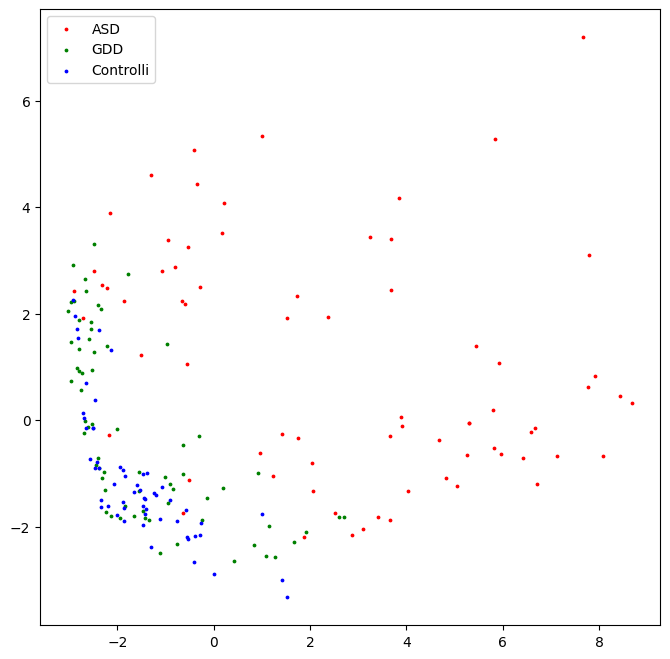

In [6]:
import matplotlib.pyplot as plt

class_colors = {'ASD':'red','GDD': 'green', 'Controlli': 'blue'}

fig, ax = plt.subplots(1, figsize=(8,8))

for class_name, color in class_colors.items():
    class_df = plot_df[plot_df["class_name"] == class_name]
    ax.scatter(class_df['x'], class_df['y'], s=3, color=color, label=class_name)
ax.legend()
plt.show()


# Task 2: Split the dataset into train and test set

To split the dataset into train and test, the dedicated class `TrainTestSample` is been coded to achieve the goal:

In [60]:

class TrainTestSampler:
    class_column: str
    ratio: float
    df: pd.DataFrame
    seed = None
    def __init__(self, df: pd.DataFrame, class_column: str, ratio: float = .7, seed = None):
        self.df = df
        self.class_column = class_column
        self.ratio = ratio
    def _extract_sample(self, class_name: str):
        sdf = self.df[self.df[self.class_column] == class_name]
        n = int(float(sdf.shape[0]) * self.ratio )
        
        return sdf.sample(n, self.seed)
    def sample(self) -> tuple[pd.DataFrame, pd.DataFrame]:
        class_names = list(self.df[self.class_column].drop_duplicates().values)
        train_df = pd.concat([
            self._extract_sample(class_name) for class_name in class_names
        ])
        test_df = df.drop(index=train_df.index)

        return (train_df, test_df)



# Task 3: Classification
It's been tasked to produce a class that allows for classification using different algorithm, this class must implement a `BaseEstimator` interface to work with `GridSearchCV`.


### KirbyClassifier
*KirbyClassifier* does implement a *BaseEstimator* interface, it allows the user to configure a given *sklearn's* classifier and optionally use dimensionality reduction using *PCA*.
It internally uses a sklearn's Pipeline object.

It's named after my favourite Nintendo character, which has the ability to *copy* enemies' abilities.


![Kirby](assets/KSSU_Copy_artwork.png)

In [114]:
class KirbyClassifier(BaseEstimator):
    _params: dict = {}
    _pipeline: Pipeline

    def __init__(self, **params):
        self._params = params
    
    def _build_pipeline(self):
        params = self._params
        pipeline_list = []
        
        # do we need PCA?
        if 'PCA' in params and params['PCA'] > 0:
            pipeline_list.append(('standard_scaler',StandardScaler()))
            pipeline_list.append(('PCA', PCA(n_components=int(params['PCA']))))
        
        # produce, configure and register our classifier to the pipeline
        classifier: BaseEstimator = params['classifier']
        classifier_params = { key: value for (key, value) in params.items() or {} if key not in ['PCA','classifier']}
        classifier.set_params(**classifier_params)
        pipeline_list.append(('classifier',classifier))

        self._pipeline = Pipeline(pipeline_list)

    def fit(self,X, y, **params):
        self._build_pipeline()
        self._pipeline.fit(X, y,**params)
        return self
    
    def score(self, X, y, sample_weight=None):
        return self._pipeline.score(X,y, sample_weight)
    
    def predict(self,X):
        return self._pipeline.predict(X)
    
    def get_params(self, deep: bool):
        return self._params
    
    def set_params(self, **params):
        self._params = params
        return self
    


In [48]:
def extract_data_target(df: pd.DataFrame):
    return df.drop('class_name', axis=1).values, df['class_name'].values

def merge_prediction(test_df: pd.DataFrame, predicted: np.array):
    return pd.DataFrame(
        index=test_df.index,
        data={
            'class': test_df['class_name'],
            'predicted': predicted
        }
    )

In [115]:


ttsampler = TrainTestSampler(df, 'class_name', ratio=.7)

train_df, test_df = ttsampler.sample()

param_grid = [
    {
        'PCA': [ int(np.log2(df.shape[1])), int(np.log(df.shape[1])), int(np.log10(df.shape[1])) ],
        'classifier': [SVC()],
        'kernel': ['linear','rbf','sigmoid'],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]

    },
    {    
        'PCA': [ int(np.log2(df.shape[1])), int(np.log(df.shape[1])), int(np.log10(df.shape[1])) ],
        'classifier': [KNeighborsClassifier()],
        'n_neighbors': list(range(5,10))
    },
    {    
        'PCA': [ 0, int(np.log2(df.shape[1])), int(np.log(df.shape[1])) ],
        'classifier': [DecisionTreeClassifier()],
        'criterion': ["gini", "entropy", "log_loss"],
        'splitter': ['best', 'random']
    },
    {    
        'PCA': [ 0, int(np.log2(df.shape[1])), int(np.log(df.shape[1])) ],
        'classifier': [RandomForestClassifier()],
        'criterion': ["gini", "entropy", "log_loss"],
        'n_estimators': [5, 10, 20, 40, 80, 100]
    }
]

cv = GridSearchCV(KirbyClassifier(), param_grid, cv=5, scoring='accuracy')
data, target = extract_data_target(df)


cv.fit(data,target)



ValueError: Invalid format specifier '%0.2' for object of type 'float'

In [ ]:
message = f"""
The best classifier has a best score of {cv.best_score_:%0.2}
"""

In [108]:
tdata, ttarget = extract_data_target(test_df)
merge_prediction(test_df,cv.predict(tdata))

,class,predicted
Pazienti,,
28,ASD,ASD
39,ASD,ASD
62,ASD,ASD
68,ASD,ASD
70,ASD,ASD
28,GDD,GDD
39,GDD,GDD
62,GDD,GDD
68,GDD,GDD
